In [1]:
#pip install fredpy


In [2]:
import pandas as pd
import numpy as np
import fredpy as fp
import matplotlib.pyplot as plt

# Loading API key


In [3]:
fp.api_key = '6ce523c65ffb8915dddf970acab037d6'

The goal of this project is to predit the corporate bond spreads. This notebook provides the code to create the dataframe required to train and run AI/ML models to predict the corporate bond spreads. The inputs used for predicting corporate bond spreads are SP 500, vix, slope(T10y-T2y spreads), skew, GDP, fed fund rate, inflation rate


# Downloading the required input data

The breakeven inflation rate represents a measure of expected inflation derived from 10-Year Treasury Constant Maturity Securities (BC_10YEAR) and 10-Year Treasury Inflation-Indexed Constant Maturity Securities (TC_10YEAR). The latest value implies what market participants expect inflation to be in the next 10 years, on average.
Starting with the update on June 21, 2019, the Treasury bond data used in calculating interest rate spreads is obtained directly from the U.S. Treasury Department.

The federal funds rate is the interest rate at which depository institutions trade federal funds (balances held at Federal Reserve Banks) with each other overnight. When a depository institution has surplus balances in its reserve account, it lends to other banks in need of larger balances. In simpler terms, a bank with excess cash, which is often referred to as liquidity, will lend to another bank that needs to quickly raise liquidity. (1) The rate that the borrowing institution pays to the lending institution is determined between the two banks; the weighted average rate for all of these types of negotiations is called the effective federal funds rate.(2) The effective federal funds rate is essentially determined by the market but is influenced by the Federal Reserve through open market operations to reach the federal funds rate target.

The S&P CoreLogic Case-Shiller Home Price Indices are the leading measures of U.S. residential real estate prices, tracking changes in the value of residential real estate nationally.

The effective yield of the ICE BofA AAA US Corporate Index, a subset of the ICE BofA US Corporate Master Index tracking the performance of US dollar denominated investment grade rated corporate debt publicly issued in the US domestic market.

In [4]:
# Restrict observations from January 1, 2014 to 2023 with daily frequency
win = ['01-01-2014','01-01-2023']

sp500 = fp.series('SP500').window(win).as_frequency(freq='D')
vix = fp.series('VIXCLS').window(win).as_frequency(freq='D')
slope = fp.series('T10Y2Y').window(win).as_frequency(freq='D')
gdp = fp.series('GDP').window(win).as_frequency(freq='Q')
fedfund_rate = fp.series('DFF').window(win).as_frequency(freq='D')
breakeven_inflation_rate = fp.series('T10YIE').window(win).as_frequency(freq='D')
case_schiller_index = fp.series('CSUSHPINSA').window(win).as_frequency(freq='M')
cb_spreads = fp.series('BAMLC0A1CAAAEY').window(win).as_frequency(freq='D')
cpi = fp.series('CPIAUCSL').window(win).as_frequency(freq='M')

# Equalize the date ranges
[sp500, vix, slope, gdp, fedfund_rate, breakeven_inflation_rate, case_schiller_index, cb_spreads,cpi] = fp.window_equalize([sp500, vix, slope, gdp, fedfund_rate, breakeven_inflation_rate, case_schiller_index, cb_spreads,cpi])

# plotting the data


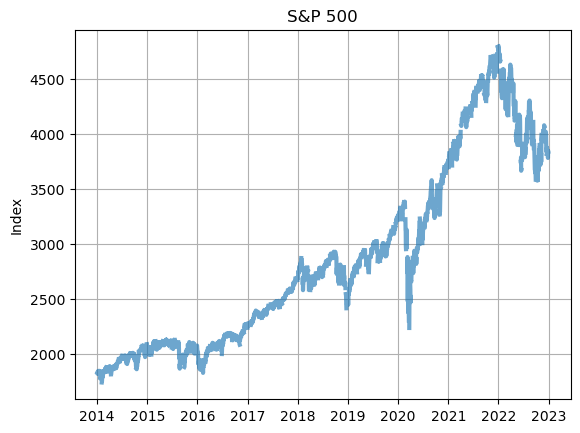

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(sp500.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(sp500.title)
ax.set_ylabel(sp500.units);

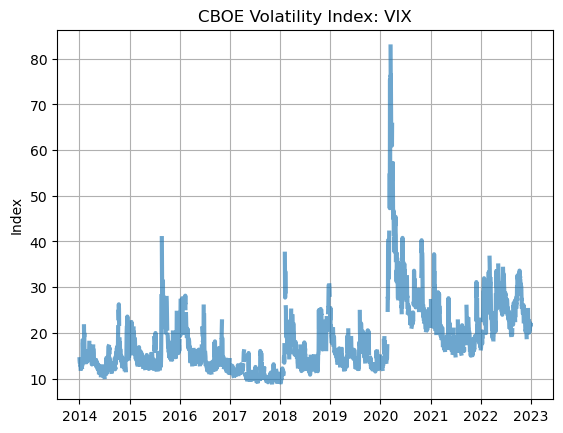

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(vix.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(vix.title)
ax.set_ylabel(vix.units);

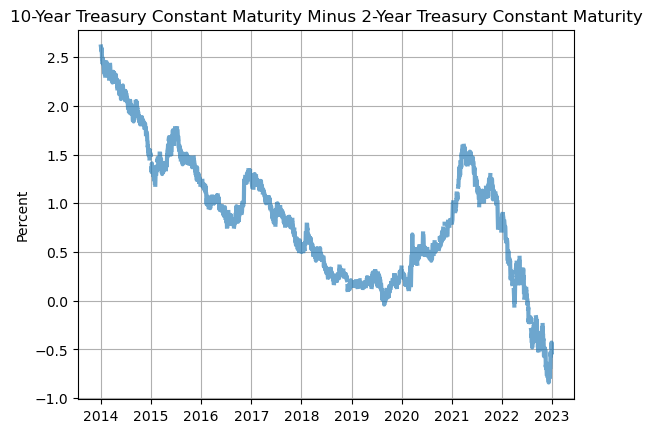

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(slope.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(slope.title)
ax.set_ylabel(slope.units);

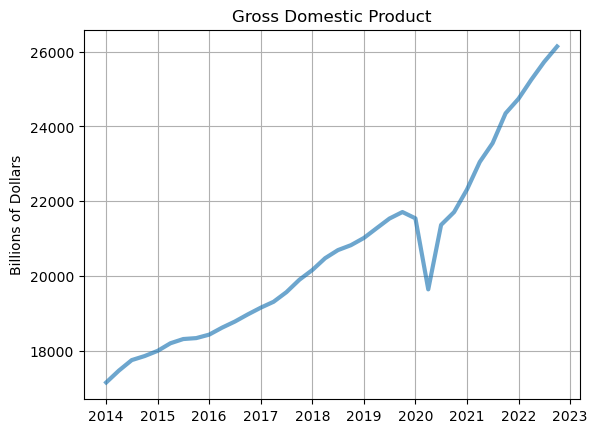

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(gdp.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(gdp.title)
ax.set_ylabel(gdp.units);

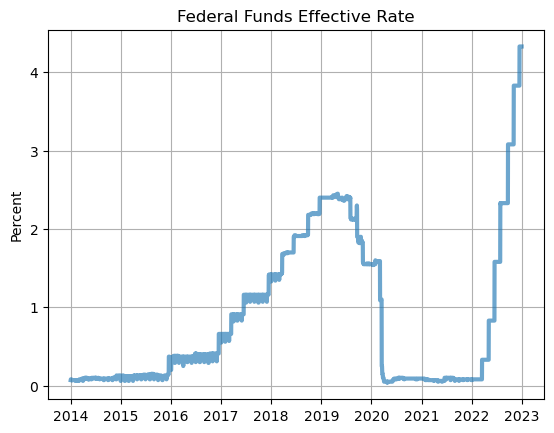

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(fedfund_rate.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(fedfund_rate.title)
ax.set_ylabel(fedfund_rate.units);

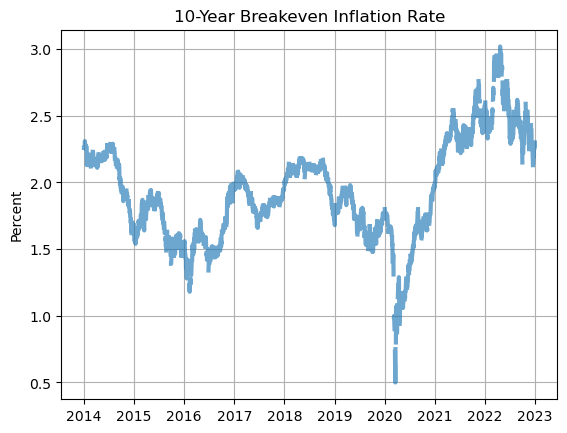

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(breakeven_inflation_rate.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(breakeven_inflation_rate.title)
ax.set_ylabel(breakeven_inflation_rate.units);

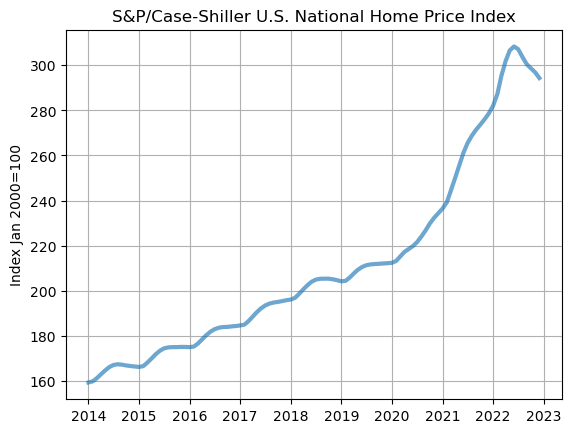

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(case_schiller_index.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(case_schiller_index.title)
ax.set_ylabel(case_schiller_index.units);

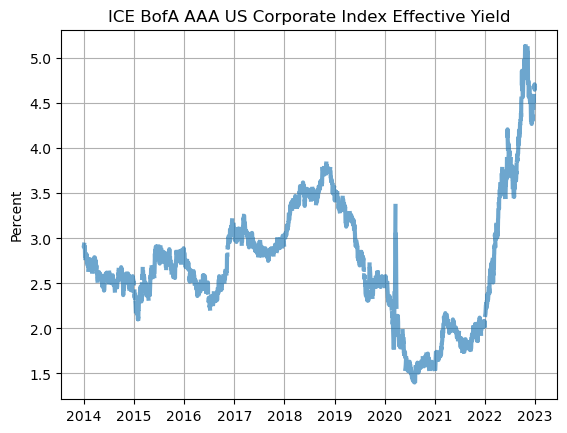

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(cb_spreads.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(cb_spreads.title)
ax.set_ylabel(cb_spreads.units);

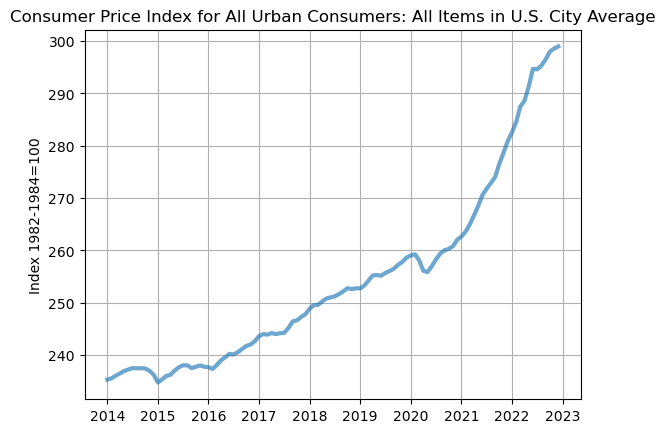

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(cpi.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(cpi.title)
ax.set_ylabel(cpi.units);

In [14]:
data = {'SP500': sp500.data,'Vix': vix.data, 'slope': slope.data,'GDP': gdp.data,'Fed fund rate': fedfund_rate.data, 'Breakeven inflation rate': breakeven_inflation_rate.data, 'House price index': case_schiller_index.data, 'US-AAA yield': cb_spreads.data,'CPI': cpi.data}


In [15]:
df = pd.DataFrame(data)
df

,SP500,Vix,slope,GDP,Fed fund rate,Breakeven inflation rate,House price index,US-AAA yield,CPI
date,,,,,,,,,
2014-01-01,NaN,NaN,NaN,17144.281,0.07,NaN,159.37,NaN,235.288
2014-01-02,1831.98,14.23,2.61,NaN,0.08,2.26,NaN,2.92,NaN
2014-01-03,1831.37,13.76,2.60,NaN,0.08,2.26,NaN,2.93,NaN
2014-01-04,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN
2014-01-05,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-26,NaN,NaN,NaN,NaN,4.33,NaN,NaN,NaN,NaN
2022-12-27,3829.25,21.65,-0.48,NaN,4.33,2.26,NaN,4.68,NaN
2022-12-28,3783.22,22.14,-0.43,NaN,4.33,2.28,NaN,4.71,NaN


In [16]:

df

,SP500,Vix,slope,GDP,Fed fund rate,Breakeven inflation rate,House price index,US-AAA yield,CPI
date,,,,,,,,,
2014-01-01,NaN,NaN,NaN,17144.281,0.07,NaN,159.37,NaN,235.288
2014-01-02,1831.98,14.23,2.61,NaN,0.08,2.26,NaN,2.92,NaN
2014-01-03,1831.37,13.76,2.60,NaN,0.08,2.26,NaN,2.93,NaN
2014-01-04,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN
2014-01-05,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-26,NaN,NaN,NaN,NaN,4.33,NaN,NaN,NaN,NaN
2022-12-27,3829.25,21.65,-0.48,NaN,4.33,2.26,NaN,4.68,NaN
2022-12-28,3783.22,22.14,-0.43,NaN,4.33,2.28,NaN,4.71,NaN


In [17]:
# interpolated dataframe
df = pd.DataFrame(data)
df['SP500']= np.log(df['SP500'] / df['SP500'].shift())
df = df.interpolate(method='linear', axis=0).ffill().bfill()
df.head()

,SP500,Vix,slope,GDP,Fed fund rate,Breakeven inflation rate,House price index,US-AAA yield,CPI
date,,,,,,,,,
2014-01-01,-0.000333,14.23,2.610000,17144.281000,0.07,2.26,159.370000,2.92,235.288000
2014-01-02,-0.000333,14.23,2.610000,17147.819022,0.08,2.26,159.386226,2.92,235.296355
2014-01-03,-0.000333,13.76,2.600000,17151.357044,0.08,2.26,159.402452,2.93,235.304710
2014-01-04,0.001266,13.69,2.593333,17154.895067,0.08,2.26,159.418677,2.92,235.313065
2014-01-05,0.002865,13.62,2.586667,17158.433089,0.08,2.26,159.434903,2.91,235.321419


<Axes: xlabel='date'>

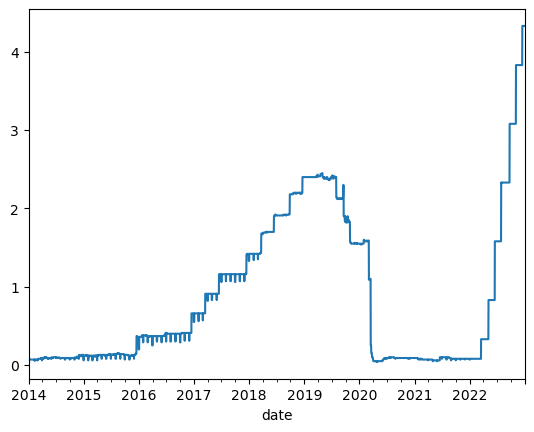

In [18]:
df["Fed fund rate"].plot()

<Axes: xlabel='date'>

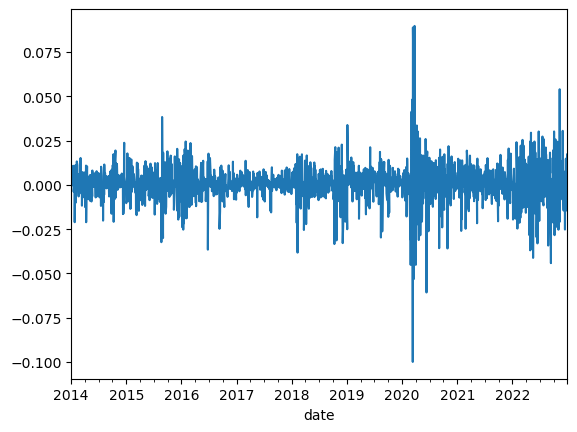

In [19]:
df["SP500"].plot()

# Linear regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
X = df[['SP500','Vix','slope','GDP','Fed fund rate','Breakeven inflation rate','House price index','CPI']]
y = df['US-AAA yield']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [22]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 9.267813487026729
betas = [-5.92317392e-01  8.07719874e-03 -2.06968644e-01 -8.06599193e-04
  7.76628154e-01  1.04804289e+00  3.75392882e-02 -1.64009422e-03]


In [23]:
Y_predicted = model.predict(X)

In [24]:
df['US-AAA yield OLS predicted' ] = Y_predicted

<Axes: xlabel='date'>

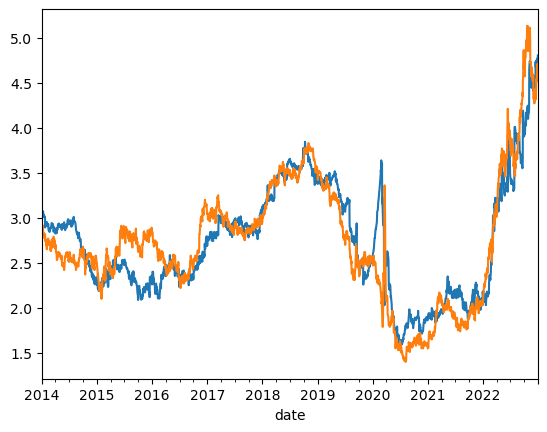

In [25]:
df["US-AAA yield OLS predicted"].plot()
df["US-AAA yield"].plot()


# Ai models

In [26]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

2023-07-24 13:58:12.998301: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
df_univariate = df["US-AAA yield"]

In [28]:
train, validate, test = np.split(df_univariate.sample(frac=1, random_state=None), [int(.8*len(df)), int(.9*len(df))])

In [29]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)

In [30]:
n_steps = 30

# train
sequence_train = train.to_list()
X_train,Y_train = split_sequence(train, n_steps)

# test
sequence_test = test.to_list()
X_test,Y_test = split_sequence(test, n_steps)

# validate
sequence_validate = validate.to_list()
X_validate,Y_validate = split_sequence(validate, n_steps)


In [31]:
print(X_train)
print(Y_train)

[[2.06  2.89  3.53  ... 2.84  2.03  2.68 ]
 [2.89  3.53  1.52  ... 2.03  2.68  2.59 ]
 [3.53  1.52  1.56  ... 2.68  2.59  3.76 ]
 ...
 [3.36  3.61  2.89  ... 1.97  3.355 2.5  ]
 [3.61  2.89  3.57  ... 3.355 2.5   1.75 ]
 [2.89  3.57  2.79  ... 2.5   1.75  3.44 ]]
[2.59 3.76 2.76 ... 1.75 3.44 1.94]


In [32]:
n_features = 1

# define model
model = Sequential()
model.add(InputLayer((n_steps, n_features)))
model.add(GRU(64))
model.add(Dense(n_steps,'relu'))
model.add(Dense(1,'linear'))

model.summary()

2023-07-24 13:58:16.181647: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense (Dense)               (None, 30)                1950      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 14,845
Trainable params: 14,845
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# fit model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=300,  verbose=1, shuffle=False)

Epoch 1/300
82/82 [==============================] - 2s 12ms/step - loss: 2.3099 - root_mean_squared_error: 1.5198 - val_loss: 0.4991 - val_root_mean_squared_error: 0.7065
Epoch 2/300
82/82 [==============================] - 1s 12ms/step - loss: 0.5021 - root_mean_squared_error: 0.7086 - val_loss: 0.4809 - val_root_mean_squared_error: 0.6935
Epoch 3/300
82/82 [==============================] - 1s 9ms/step - loss: 0.4958 - root_mean_squared_error: 0.7041 - val_loss: 0.4752 - val_root_mean_squared_error: 0.6894
Epoch 4/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4922 - root_mean_squared_error: 0.7016 - val_loss: 0.4723 - val_root_mean_squared_error: 0.6872
Epoch 5/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4902 - root_mean_squared_error: 0.7001 - val_loss: 0.4711 - val_root_mean_squared_error: 0.6863
Epoch 6/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4889 - root_mean_squared_error: 0.6992 - val_loss: 0.4708 - val_root

Epoch 49/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4857 - root_mean_squared_error: 0.6969 - val_loss: 0.4753 - val_root_mean_squared_error: 0.6894
Epoch 50/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4857 - root_mean_squared_error: 0.6969 - val_loss: 0.4752 - val_root_mean_squared_error: 0.6893
Epoch 51/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4856 - root_mean_squared_error: 0.6969 - val_loss: 0.4751 - val_root_mean_squared_error: 0.6892
Epoch 52/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4856 - root_mean_squared_error: 0.6969 - val_loss: 0.4749 - val_root_mean_squared_error: 0.6892
Epoch 53/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4856 - root_mean_squared_error: 0.6968 - val_loss: 0.4748 - val_root_mean_squared_error: 0.6891
Epoch 54/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4856 - root_mean_squared_error: 0.6968 - val_loss: 0.4747 - val_

82/82 [==============================] - 1s 7ms/step - loss: 0.4846 - root_mean_squared_error: 0.6961 - val_loss: 0.4710 - val_root_mean_squared_error: 0.6863
Epoch 97/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4846 - root_mean_squared_error: 0.6961 - val_loss: 0.4709 - val_root_mean_squared_error: 0.6862
Epoch 98/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4846 - root_mean_squared_error: 0.6961 - val_loss: 0.4711 - val_root_mean_squared_error: 0.6863
Epoch 99/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4845 - root_mean_squared_error: 0.6961 - val_loss: 0.4709 - val_root_mean_squared_error: 0.6862
Epoch 100/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4845 - root_mean_squared_error: 0.6961 - val_loss: 0.4708 - val_root_mean_squared_error: 0.6862
Epoch 101/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4845 - root_mean_squared_error: 0.6960 - val_loss: 0.4708 - val_root_mean_s

82/82 [==============================] - 1s 7ms/step - loss: 0.4831 - root_mean_squared_error: 0.6951 - val_loss: 0.4697 - val_root_mean_squared_error: 0.6854
Epoch 144/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4831 - root_mean_squared_error: 0.6950 - val_loss: 0.4698 - val_root_mean_squared_error: 0.6854
Epoch 145/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4830 - root_mean_squared_error: 0.6950 - val_loss: 0.4698 - val_root_mean_squared_error: 0.6854
Epoch 146/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4829 - root_mean_squared_error: 0.6949 - val_loss: 0.4698 - val_root_mean_squared_error: 0.6854
Epoch 147/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4834 - root_mean_squared_error: 0.6953 - val_loss: 0.4725 - val_root_mean_squared_error: 0.6874
Epoch 148/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4832 - root_mean_squared_error: 0.6951 - val_loss: 0.4709 - val_root_mea

82/82 [==============================] - 1s 7ms/step - loss: 0.4772 - root_mean_squared_error: 0.6908 - val_loss: 0.4732 - val_root_mean_squared_error: 0.6879
Epoch 191/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4769 - root_mean_squared_error: 0.6906 - val_loss: 0.4734 - val_root_mean_squared_error: 0.6880
Epoch 192/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4767 - root_mean_squared_error: 0.6905 - val_loss: 0.4735 - val_root_mean_squared_error: 0.6881
Epoch 193/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4766 - root_mean_squared_error: 0.6903 - val_loss: 0.4736 - val_root_mean_squared_error: 0.6882
Epoch 194/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4763 - root_mean_squared_error: 0.6901 - val_loss: 0.4737 - val_root_mean_squared_error: 0.6883
Epoch 195/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4761 - root_mean_squared_error: 0.6900 - val_loss: 0.4741 - val_root_mea

82/82 [==============================] - 1s 7ms/step - loss: 0.4404 - root_mean_squared_error: 0.6636 - val_loss: 0.4958 - val_root_mean_squared_error: 0.7042
Epoch 238/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4386 - root_mean_squared_error: 0.6623 - val_loss: 0.4968 - val_root_mean_squared_error: 0.7049
Epoch 239/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4368 - root_mean_squared_error: 0.6609 - val_loss: 0.4955 - val_root_mean_squared_error: 0.7039
Epoch 240/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4349 - root_mean_squared_error: 0.6594 - val_loss: 0.4939 - val_root_mean_squared_error: 0.7028
Epoch 241/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4326 - root_mean_squared_error: 0.6577 - val_loss: 0.4984 - val_root_mean_squared_error: 0.7059
Epoch 242/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4313 - root_mean_squared_error: 0.6567 - val_loss: 0.5001 - val_root_mea

82/82 [==============================] - 1s 7ms/step - loss: 0.3144 - root_mean_squared_error: 0.5607 - val_loss: 0.6613 - val_root_mean_squared_error: 0.8132
Epoch 285/300
82/82 [==============================] - 1s 7ms/step - loss: 0.3145 - root_mean_squared_error: 0.5608 - val_loss: 0.6885 - val_root_mean_squared_error: 0.8298
Epoch 286/300
82/82 [==============================] - 1s 7ms/step - loss: 0.3115 - root_mean_squared_error: 0.5581 - val_loss: 0.6741 - val_root_mean_squared_error: 0.8210
Epoch 287/300
82/82 [==============================] - 1s 7ms/step - loss: 0.3088 - root_mean_squared_error: 0.5557 - val_loss: 0.7020 - val_root_mean_squared_error: 0.8378
Epoch 288/300
82/82 [==============================] - 1s 7ms/step - loss: 0.3036 - root_mean_squared_error: 0.5510 - val_loss: 0.7181 - val_root_mean_squared_error: 0.8474
Epoch 289/300
82/82 [==============================] - 1s 7ms/step - loss: 0.3050 - root_mean_squared_error: 0.5522 - val_loss: 0.7214 - val_root_mea

In [34]:
# demonstrate prediction
Y_hat = model.predict(X_validate, verbose=0)


In [35]:
train_results = pd.DataFrame(data={'Train Predictions':Y_hat.flatten(),'Actuals':Y_validate})
train_results

,Train Predictions,Actuals
0,2.706974,2.473333
1,3.010007,2.290000
2,3.064777,2.170000
3,2.955579,3.660000
4,2.651456,1.410000
...,...,...
294,2.813693,2.920000
295,2.819090,2.360000
296,2.500510,2.580000
297,2.542902,2.386667


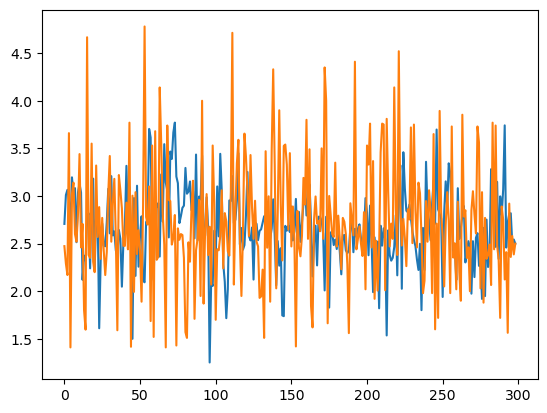

In [36]:
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

In [37]:
n_steps = 30
# train
sequence_train = train.to_list()
X_train,Y_train = split_sequence(train, n_steps)

# test
sequence_test = test.to_list()
X_test,Y_test = split_sequence(test, n_steps)

# validate
sequence_validate = validate.to_list()
X_validate,Y_validate = split_sequence(validate, n_steps)

In [38]:
n_features = 1

# define model
model1 = Sequential()
model1.add(InputLayer((n_steps, n_features)))
model1.add(Conv1D(64,kernel_size=2))
model1.add(Flatten())
model1.add(Dense(n_steps,'relu'))
model1.add(Dense(1,'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 64)            192       
                                                                 
 flatten (Flatten)           (None, 1856)              0         
                                                                 
 dense_2 (Dense)             (None, 30)                55710     
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 55,933
Trainable params: 55,933
Non-trainable params: 0
_________________________________________________________________


In [39]:
model1.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# fit model
model1.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=500,  verbose=1, shuffle=False)

Epoch 1/500
82/82 [==============================] - 1s 2ms/step - loss: 0.8055 - root_mean_squared_error: 0.8975 - val_loss: 0.4905 - val_root_mean_squared_error: 0.7004
Epoch 2/500
82/82 [==============================] - 0s 1ms/step - loss: 0.5104 - root_mean_squared_error: 0.7144 - val_loss: 0.4830 - val_root_mean_squared_error: 0.6950
Epoch 3/500
82/82 [==============================] - 0s 1ms/step - loss: 0.5053 - root_mean_squared_error: 0.7109 - val_loss: 0.4822 - val_root_mean_squared_error: 0.6944
Epoch 4/500
82/82 [==============================] - 0s 1ms/step - loss: 0.5025 - root_mean_squared_error: 0.7089 - val_loss: 0.4826 - val_root_mean_squared_error: 0.6947
Epoch 5/500
82/82 [==============================] - 0s 1ms/step - loss: 0.5009 - root_mean_squared_error: 0.7077 - val_loss: 0.4833 - val_root_mean_squared_error: 0.6952
Epoch 6/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4998 - root_mean_squared_error: 0.7070 - val_loss: 0.4842 - val_root_m

Epoch 49/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4882 - root_mean_squared_error: 0.6987 - val_loss: 0.4921 - val_root_mean_squared_error: 0.7015
Epoch 50/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4879 - root_mean_squared_error: 0.6985 - val_loss: 0.4915 - val_root_mean_squared_error: 0.7011
Epoch 51/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4879 - root_mean_squared_error: 0.6985 - val_loss: 0.4910 - val_root_mean_squared_error: 0.7007
Epoch 52/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4875 - root_mean_squared_error: 0.6982 - val_loss: 0.4919 - val_root_mean_squared_error: 0.7014
Epoch 53/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4872 - root_mean_squared_error: 0.6980 - val_loss: 0.4920 - val_root_mean_squared_error: 0.7015
Epoch 54/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4874 - root_mean_squared_error: 0.6982 - val_loss: 0.4906 - val_

82/82 [==============================] - 0s 1ms/step - loss: 0.4764 - root_mean_squared_error: 0.6902 - val_loss: 0.4982 - val_root_mean_squared_error: 0.7058
Epoch 97/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4759 - root_mean_squared_error: 0.6899 - val_loss: 0.4983 - val_root_mean_squared_error: 0.7059
Epoch 98/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4760 - root_mean_squared_error: 0.6899 - val_loss: 0.4984 - val_root_mean_squared_error: 0.7059
Epoch 99/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4753 - root_mean_squared_error: 0.6894 - val_loss: 0.4985 - val_root_mean_squared_error: 0.7061
Epoch 100/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4749 - root_mean_squared_error: 0.6891 - val_loss: 0.4987 - val_root_mean_squared_error: 0.7062
Epoch 101/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4745 - root_mean_squared_error: 0.6888 - val_loss: 0.4984 - val_root_mean_s

82/82 [==============================] - 0s 1ms/step - loss: 0.4625 - root_mean_squared_error: 0.6801 - val_loss: 0.5020 - val_root_mean_squared_error: 0.7085
Epoch 144/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4623 - root_mean_squared_error: 0.6799 - val_loss: 0.5018 - val_root_mean_squared_error: 0.7084
Epoch 145/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4622 - root_mean_squared_error: 0.6799 - val_loss: 0.5015 - val_root_mean_squared_error: 0.7082
Epoch 146/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4620 - root_mean_squared_error: 0.6797 - val_loss: 0.5022 - val_root_mean_squared_error: 0.7087
Epoch 147/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4616 - root_mean_squared_error: 0.6794 - val_loss: 0.5025 - val_root_mean_squared_error: 0.7088
Epoch 148/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4615 - root_mean_squared_error: 0.6793 - val_loss: 0.5024 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.4564 - root_mean_squared_error: 0.6756 - val_loss: 0.5105 - val_root_mean_squared_error: 0.7145
Epoch 191/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4560 - root_mean_squared_error: 0.6753 - val_loss: 0.5106 - val_root_mean_squared_error: 0.7146
Epoch 192/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4562 - root_mean_squared_error: 0.6754 - val_loss: 0.5105 - val_root_mean_squared_error: 0.7145
Epoch 193/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4560 - root_mean_squared_error: 0.6753 - val_loss: 0.5107 - val_root_mean_squared_error: 0.7147
Epoch 194/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4559 - root_mean_squared_error: 0.6752 - val_loss: 0.5113 - val_root_mean_squared_error: 0.7150
Epoch 195/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4561 - root_mean_squared_error: 0.6753 - val_loss: 0.5105 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.4534 - root_mean_squared_error: 0.6733 - val_loss: 0.5140 - val_root_mean_squared_error: 0.7169
Epoch 238/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4533 - root_mean_squared_error: 0.6732 - val_loss: 0.5140 - val_root_mean_squared_error: 0.7170
Epoch 239/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4532 - root_mean_squared_error: 0.6732 - val_loss: 0.5144 - val_root_mean_squared_error: 0.7172
Epoch 240/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4532 - root_mean_squared_error: 0.6732 - val_loss: 0.5145 - val_root_mean_squared_error: 0.7173
Epoch 241/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4530 - root_mean_squared_error: 0.6731 - val_loss: 0.5156 - val_root_mean_squared_error: 0.7181
Epoch 242/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4538 - root_mean_squared_error: 0.6737 - val_loss: 0.5136 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.4511 - root_mean_squared_error: 0.6716 - val_loss: 0.5168 - val_root_mean_squared_error: 0.7189
Epoch 285/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4512 - root_mean_squared_error: 0.6717 - val_loss: 0.5167 - val_root_mean_squared_error: 0.7188
Epoch 286/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4516 - root_mean_squared_error: 0.6720 - val_loss: 0.5167 - val_root_mean_squared_error: 0.7188
Epoch 287/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4514 - root_mean_squared_error: 0.6719 - val_loss: 0.5162 - val_root_mean_squared_error: 0.7185
Epoch 288/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4515 - root_mean_squared_error: 0.6719 - val_loss: 0.5172 - val_root_mean_squared_error: 0.7191
Epoch 289/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4513 - root_mean_squared_error: 0.6718 - val_loss: 0.5157 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.4499 - root_mean_squared_error: 0.6707 - val_loss: 0.5193 - val_root_mean_squared_error: 0.7206
Epoch 332/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4493 - root_mean_squared_error: 0.6703 - val_loss: 0.5198 - val_root_mean_squared_error: 0.7210
Epoch 333/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4496 - root_mean_squared_error: 0.6705 - val_loss: 0.5192 - val_root_mean_squared_error: 0.7206
Epoch 334/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4496 - root_mean_squared_error: 0.6705 - val_loss: 0.5195 - val_root_mean_squared_error: 0.7208
Epoch 335/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4493 - root_mean_squared_error: 0.6703 - val_loss: 0.5198 - val_root_mean_squared_error: 0.7210
Epoch 336/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4494 - root_mean_squared_error: 0.6704 - val_loss: 0.5196 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.4476 - root_mean_squared_error: 0.6691 - val_loss: 0.5232 - val_root_mean_squared_error: 0.7233
Epoch 379/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4477 - root_mean_squared_error: 0.6691 - val_loss: 0.5242 - val_root_mean_squared_error: 0.7240
Epoch 380/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4475 - root_mean_squared_error: 0.6690 - val_loss: 0.5252 - val_root_mean_squared_error: 0.7247
Epoch 381/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4478 - root_mean_squared_error: 0.6692 - val_loss: 0.5226 - val_root_mean_squared_error: 0.7229
Epoch 382/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4477 - root_mean_squared_error: 0.6691 - val_loss: 0.5239 - val_root_mean_squared_error: 0.7238
Epoch 383/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4475 - root_mean_squared_error: 0.6690 - val_loss: 0.5245 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.4452 - root_mean_squared_error: 0.6672 - val_loss: 0.5288 - val_root_mean_squared_error: 0.7272
Epoch 426/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4453 - root_mean_squared_error: 0.6673 - val_loss: 0.5291 - val_root_mean_squared_error: 0.7274
Epoch 427/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4449 - root_mean_squared_error: 0.6670 - val_loss: 0.5290 - val_root_mean_squared_error: 0.7273
Epoch 428/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4451 - root_mean_squared_error: 0.6671 - val_loss: 0.5294 - val_root_mean_squared_error: 0.7276
Epoch 429/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4449 - root_mean_squared_error: 0.6670 - val_loss: 0.5290 - val_root_mean_squared_error: 0.7273
Epoch 430/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4448 - root_mean_squared_error: 0.6669 - val_loss: 0.5292 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.4417 - root_mean_squared_error: 0.6646 - val_loss: 0.5313 - val_root_mean_squared_error: 0.7289
Epoch 473/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4418 - root_mean_squared_error: 0.6646 - val_loss: 0.5317 - val_root_mean_squared_error: 0.7292
Epoch 474/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4417 - root_mean_squared_error: 0.6646 - val_loss: 0.5316 - val_root_mean_squared_error: 0.7291
Epoch 475/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4416 - root_mean_squared_error: 0.6646 - val_loss: 0.5319 - val_root_mean_squared_error: 0.7293
Epoch 476/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4414 - root_mean_squared_error: 0.6644 - val_loss: 0.5319 - val_root_mean_squared_error: 0.7293
Epoch 477/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4415 - root_mean_squared_error: 0.6645 - val_loss: 0.5329 - val_root_mea

In [40]:
# demonstrate prediction
Y_hat1 = model1.predict(X_validate, verbose=0)


In [41]:
train_results = pd.DataFrame(data={'Train Predictions':Y_hat1.flatten(),'Actuals':Y_validate})
train_results

,Train Predictions,Actuals
0,3.017026,2.473333
1,2.884045,2.290000
2,2.948392,2.170000
3,2.666038,3.660000
4,2.686361,1.410000
...,...,...
294,2.681373,2.920000
295,2.749314,2.360000
296,2.534868,2.580000
297,2.650103,2.386667


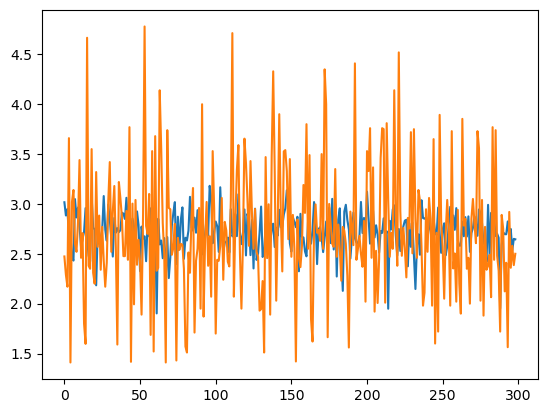

In [42]:
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

##  Multivariate regression


In [43]:
df1=df[['SP500','Vix','slope',  'GDP','Fed fund rate',  'CPI',  'US-AAA yield']] #Breakeven inflation rate',  'House price index', 'CPI' 'US-AAA yield']

In [44]:
def df_to_X_y2(df,window_size):
    df_as_np = df
    X = []
    Y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][6]
        Y.append(label)

    return np.array(X), np.array(Y)


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
# input scaling
scaler_input = StandardScaler()
scaler_input.fit(df1)
df_scaled_input = scaler_input.transform(df1)
print(df_scaled_input)

# output scaling
scaler_output = StandardScaler()
scaler_output.fit(df1[["US-AAA yield"]])
df_scaled_output = scaler_output.transform(df1[["US-AAA yield"]])
print(df_scaled_output)


[[-0.08497256 -0.53050313  2.62586511 ... -0.83384085 -1.08724304
   0.27460134]
 [-0.08497256 -0.53050313  2.62586511 ... -0.82328822 -1.08677045
   0.27460134]
 [-0.08497256 -0.59261133  2.61093184 ... -0.82328822 -1.08629786
   0.28912686]
 ...
 [-1.27240151  0.51476475 -1.91384898 ...  3.6615797   2.51603153
   2.87466991]
 [ 1.69647338  0.42226317 -2.03331514 ...  3.6615797   2.51603153
   2.78751677]
 [-0.30820697  0.45265655 -2.06318168 ...  3.6615797   2.51603153
   2.81656782]]
[[0.27460134]
 [0.27460134]
 [0.28912686]
 ...
 [2.87466991]
 [2.78751677]
 [2.81656782]]


In [48]:
df_scaled_input
n_steps = 16

In [49]:
x,y = df_to_X_y2(df_scaled_input,n_steps)
x.shape, y.shape

((3270, 16, 7), (3270,))

In [50]:
def train_test_validate_split(x,y):
    data_len = x.shape[0]
    train_len = int(0.8*data_len)
    test_len  = int(0.9*data_len)

    x_train, y_train = x[:train_len], y[:train_len]
    x_val, y_val = x[train_len:test_len], y[train_len:test_len]
    x_test, y_test = x[test_len:],y[test_len:]

    return x_train, y_train,x_test, y_test,x_val, y_val

In [51]:
x.shape[0]

3270

In [52]:
x_train, y_train,x_test, y_test,x_val, y_val = train_test_validate_split(x,y)

## GRU model


In [53]:
n_features = 7

# define model
model_gru = Sequential()
model_gru.add(InputLayer((n_steps, n_features)))
model_gru.add(GRU(64))
model_gru.add(Dense(n_steps,'relu'))
model_gru.add(Dense(1,'linear'))

model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                14016     
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 15,073
Trainable params: 15,073
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_gru.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# fit model
model_gru.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500,  verbose=1, shuffle=False)

Epoch 1/500
82/82 [==============================] - 2s 8ms/step - loss: 0.5326 - root_mean_squared_error: 0.7298 - val_loss: 0.8909 - val_root_mean_squared_error: 0.9439
Epoch 2/500
82/82 [==============================] - 0s 5ms/step - loss: 0.3223 - root_mean_squared_error: 0.5677 - val_loss: 0.5546 - val_root_mean_squared_error: 0.7447
Epoch 3/500
82/82 [==============================] - 0s 4ms/step - loss: 0.2045 - root_mean_squared_error: 0.4523 - val_loss: 0.2938 - val_root_mean_squared_error: 0.5420
Epoch 4/500
82/82 [==============================] - 0s 4ms/step - loss: 0.1228 - root_mean_squared_error: 0.3504 - val_loss: 0.1274 - val_root_mean_squared_error: 0.3570
Epoch 5/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0708 - root_mean_squared_error: 0.2660 - val_loss: 0.0543 - val_root_mean_squared_error: 0.2330
Epoch 6/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0419 - root_mean_squared_error: 0.2047 - val_loss: 0.0462 - val_root_m

Epoch 49/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0038 - root_mean_squared_error: 0.0613 - val_loss: 0.0240 - val_root_mean_squared_error: 0.1550
Epoch 50/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0037 - root_mean_squared_error: 0.0611 - val_loss: 0.0246 - val_root_mean_squared_error: 0.1570
Epoch 51/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0037 - root_mean_squared_error: 0.0606 - val_loss: 0.0243 - val_root_mean_squared_error: 0.1559
Epoch 52/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0036 - root_mean_squared_error: 0.0602 - val_loss: 0.0246 - val_root_mean_squared_error: 0.1567
Epoch 53/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0036 - root_mean_squared_error: 0.0601 - val_loss: 0.0247 - val_root_mean_squared_error: 0.1571
Epoch 54/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0035 - root_mean_squared_error: 0.0593 - val_loss: 0.0245 - val_

82/82 [==============================] - 0s 4ms/step - loss: 0.0026 - root_mean_squared_error: 0.0512 - val_loss: 0.0197 - val_root_mean_squared_error: 0.1404
Epoch 97/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0026 - root_mean_squared_error: 0.0507 - val_loss: 0.0232 - val_root_mean_squared_error: 0.1524
Epoch 98/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0027 - root_mean_squared_error: 0.0523 - val_loss: 0.0200 - val_root_mean_squared_error: 0.1413
Epoch 99/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0031 - root_mean_squared_error: 0.0561 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1368
Epoch 100/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0028 - root_mean_squared_error: 0.0534 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1303
Epoch 101/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0045 - root_mean_squared_error: 0.0673 - val_loss: 0.0194 - val_root_mean_s

82/82 [==============================] - 0s 4ms/step - loss: 0.0029 - root_mean_squared_error: 0.0537 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1076
Epoch 144/500
82/82 [==============================] - 0s 6ms/step - loss: 0.0032 - root_mean_squared_error: 0.0564 - val_loss: 0.0180 - val_root_mean_squared_error: 0.1342
Epoch 145/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0023 - root_mean_squared_error: 0.0479 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1219
Epoch 146/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0029 - root_mean_squared_error: 0.0535 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1078
Epoch 147/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0459 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1207
Epoch 148/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0027 - root_mean_squared_error: 0.0516 - val_loss: 0.0163 - val_root_mea

82/82 [==============================] - 0s 4ms/step - loss: 0.0020 - root_mean_squared_error: 0.0445 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1123
Epoch 191/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0020 - root_mean_squared_error: 0.0452 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1145
Epoch 192/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0020 - root_mean_squared_error: 0.0446 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1146
Epoch 193/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0020 - root_mean_squared_error: 0.0443 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1119
Epoch 194/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0456 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1117
Epoch 195/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0020 - root_mean_squared_error: 0.0449 - val_loss: 0.0131 - val_root_mea

82/82 [==============================] - 0s 5ms/step - loss: 0.0028 - root_mean_squared_error: 0.0530 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0974
Epoch 238/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0440 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1065
Epoch 239/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0029 - root_mean_squared_error: 0.0538 - val_loss: 0.0136 - val_root_mean_squared_error: 0.1165
Epoch 240/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0020 - root_mean_squared_error: 0.0442 - val_loss: 0.0114 - val_root_mean_squared_error: 0.1068
Epoch 241/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0028 - root_mean_squared_error: 0.0531 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0930
Epoch 242/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0019 - root_mean_squared_error: 0.0438 - val_loss: 0.0117 - val_root_mea

82/82 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0417 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1030
Epoch 285/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0023 - root_mean_squared_error: 0.0477 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1128
Epoch 286/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0418 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1019
Epoch 287/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0022 - root_mean_squared_error: 0.0466 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0953
Epoch 288/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0018 - root_mean_squared_error: 0.0423 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1070
Epoch 289/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0022 - root_mean_squared_error: 0.0470 - val_loss: 0.0122 - val_root_mea

82/82 [==============================] - 0s 4ms/step - loss: 0.0023 - root_mean_squared_error: 0.0479 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1094
Epoch 332/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0019 - root_mean_squared_error: 0.0435 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0967
Epoch 333/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0022 - root_mean_squared_error: 0.0467 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0921
Epoch 334/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0019 - root_mean_squared_error: 0.0441 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1077
Epoch 335/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0461 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1083
Epoch 336/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0455 - val_loss: 0.0087 - val_root_mea

82/82 [==============================] - 0s 4ms/step - loss: 0.0022 - root_mean_squared_error: 0.0466 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0894
Epoch 379/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0408 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0989
Epoch 380/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0022 - root_mean_squared_error: 0.0467 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1074
Epoch 381/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0408 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0964
Epoch 382/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0459 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0897
Epoch 383/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0413 - val_loss: 0.0106 - val_root_mea

82/82 [==============================] - 0s 4ms/step - loss: 0.0020 - root_mean_squared_error: 0.0449 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1049
Epoch 426/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0018 - root_mean_squared_error: 0.0419 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0984
Epoch 427/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0457 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0877
Epoch 428/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0409 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0940
Epoch 429/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0461 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1051
Epoch 430/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0016 - root_mean_squared_error: 0.0404 - val_loss: 0.0090 - val_root_mea

82/82 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0415 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0878
Epoch 473/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0018 - root_mean_squared_error: 0.0429 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0874
Epoch 474/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0018 - root_mean_squared_error: 0.0425 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1003
Epoch 475/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0018 - root_mean_squared_error: 0.0422 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0967
Epoch 476/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0019 - root_mean_squared_error: 0.0433 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0868
Epoch 477/500
82/82 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0411 - val_loss: 0.0079 - val_root_mea

In [55]:
# demonstrate prediction
y_hat_gru = model_gru.predict(x_val, verbose=0)

In [56]:
train_results = pd.DataFrame(data={'Train Predictions':y_hat_gru.flatten(),'Actuals':y_val})
print(train_results)

     Train Predictions   Actuals
0            -0.890972 -0.858389
1            -0.856537 -0.814813
2            -0.856887 -0.843864
3            -0.818664 -0.863231
4            -0.830110 -0.882599
..                 ...       ...
322          -0.331045 -0.495251
323          -0.334803 -0.393573
324          -0.434618 -0.248317
325          -0.268800 -0.258001
326          -0.209405 -0.267685

[327 rows x 2 columns]


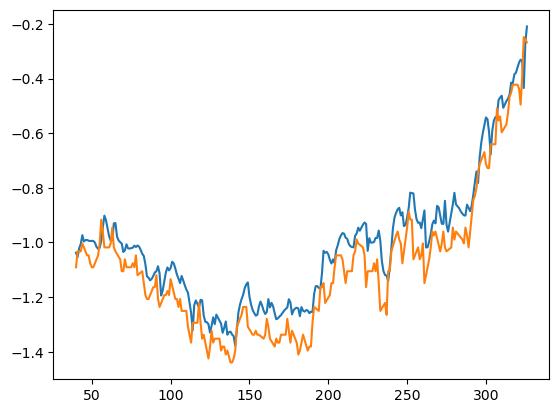

In [57]:
plt.plot(train_results['Train Predictions'][40:])
plt.plot(train_results['Actuals'][40:])

## 1D Convolutional neural network model

In [58]:
n_features = 7

# define model
model_conv1d = Sequential()
model_conv1d.add(InputLayer((n_steps, n_features)))
model_conv1d.add(Conv1D(64,kernel_size=2))
model_conv1d.add(Flatten())
model_conv1d.add(Dense(n_steps,'relu'))
model_conv1d.add(Dense(1,'linear'))

model_conv1d.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 15, 64)            960       
                                                                 
 flatten_1 (Flatten)         (None, 960)               0         
                                                                 
 dense_6 (Dense)             (None, 16)                15376     
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16,353
Trainable params: 16,353
Non-trainable params: 0
_________________________________________________________________


In [59]:
model_conv1d.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# fit model
model_conv1d.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500,  verbose=1, shuffle=False)

Epoch 1/500
82/82 [==============================] - 0s 2ms/step - loss: 0.3270 - root_mean_squared_error: 0.5718 - val_loss: 0.3505 - val_root_mean_squared_error: 0.5920
Epoch 2/500
82/82 [==============================] - 0s 1ms/step - loss: 0.1714 - root_mean_squared_error: 0.4140 - val_loss: 0.0723 - val_root_mean_squared_error: 0.2689
Epoch 3/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0771 - root_mean_squared_error: 0.2777 - val_loss: 0.0866 - val_root_mean_squared_error: 0.2942
Epoch 4/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0557 - root_mean_squared_error: 0.2361 - val_loss: 0.0749 - val_root_mean_squared_error: 0.2736
Epoch 5/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0458 - root_mean_squared_error: 0.2140 - val_loss: 0.0729 - val_root_mean_squared_error: 0.2700
Epoch 6/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0411 - root_mean_squared_error: 0.2028 - val_loss: 0.0759 - val_root_m

Epoch 49/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0349 - root_mean_squared_error: 0.1867 - val_loss: 0.0253 - val_root_mean_squared_error: 0.1591
Epoch 50/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0322 - root_mean_squared_error: 0.1793 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1373
Epoch 51/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0330 - root_mean_squared_error: 0.1818 - val_loss: 0.0311 - val_root_mean_squared_error: 0.1765
Epoch 52/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0254 - root_mean_squared_error: 0.1595 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 53/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0237 - root_mean_squared_error: 0.1541 - val_loss: 0.0344 - val_root_mean_squared_error: 0.1855
Epoch 54/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0184 - root_mean_squared_error: 0.1358 - val_loss: 0.0140 - val_

82/82 [==============================] - 0s 1ms/step - loss: 0.0141 - root_mean_squared_error: 0.1188 - val_loss: 0.0165 - val_root_mean_squared_error: 0.1284
Epoch 97/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0146 - root_mean_squared_error: 0.1209 - val_loss: 0.1004 - val_root_mean_squared_error: 0.3169
Epoch 98/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0131 - root_mean_squared_error: 0.1146 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1198
Epoch 99/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0138 - root_mean_squared_error: 0.1173 - val_loss: 0.0866 - val_root_mean_squared_error: 0.2943
Epoch 100/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0121 - root_mean_squared_error: 0.1101 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1157
Epoch 101/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0130 - root_mean_squared_error: 0.1142 - val_loss: 0.0813 - val_root_mean_s

82/82 [==============================] - 0s 1ms/step - loss: 0.0106 - root_mean_squared_error: 0.1031 - val_loss: 0.0584 - val_root_mean_squared_error: 0.2417
Epoch 144/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0096 - root_mean_squared_error: 0.0978 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1083
Epoch 145/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0107 - root_mean_squared_error: 0.1033 - val_loss: 0.0708 - val_root_mean_squared_error: 0.2661
Epoch 146/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0098 - root_mean_squared_error: 0.0989 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1084
Epoch 147/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0107 - root_mean_squared_error: 0.1036 - val_loss: 0.0599 - val_root_mean_squared_error: 0.2446
Epoch 148/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0098 - root_mean_squared_error: 0.0988 - val_loss: 0.0126 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.0089 - root_mean_squared_error: 0.0941 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1159
Epoch 191/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0097 - root_mean_squared_error: 0.0984 - val_loss: 0.0385 - val_root_mean_squared_error: 0.1963
Epoch 192/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0090 - root_mean_squared_error: 0.0947 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1138
Epoch 193/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0096 - root_mean_squared_error: 0.0981 - val_loss: 0.0397 - val_root_mean_squared_error: 0.1993
Epoch 194/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0088 - root_mean_squared_error: 0.0936 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1101
Epoch 195/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0091 - root_mean_squared_error: 0.0956 - val_loss: 0.0370 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.0088 - root_mean_squared_error: 0.0939 - val_loss: 0.0341 - val_root_mean_squared_error: 0.1846
Epoch 238/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0079 - root_mean_squared_error: 0.0890 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1020
Epoch 239/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0083 - root_mean_squared_error: 0.0910 - val_loss: 0.0289 - val_root_mean_squared_error: 0.1699
Epoch 240/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0074 - root_mean_squared_error: 0.0859 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0963
Epoch 241/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0074 - root_mean_squared_error: 0.0859 - val_loss: 0.0259 - val_root_mean_squared_error: 0.1608
Epoch 242/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0065 - root_mean_squared_error: 0.0805 - val_loss: 0.0087 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.0051 - root_mean_squared_error: 0.0713 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0937
Epoch 285/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0053 - root_mean_squared_error: 0.0728 - val_loss: 0.0158 - val_root_mean_squared_error: 0.1258
Epoch 286/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0058 - root_mean_squared_error: 0.0763 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0875
Epoch 287/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0059 - root_mean_squared_error: 0.0768 - val_loss: 0.0171 - val_root_mean_squared_error: 0.1308
Epoch 288/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0064 - root_mean_squared_error: 0.0799 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0840
Epoch 289/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0067 - root_mean_squared_error: 0.0820 - val_loss: 0.0186 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.0128 - root_mean_squared_error: 0.1130 - val_loss: 0.0398 - val_root_mean_squared_error: 0.1996
Epoch 332/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0100 - root_mean_squared_error: 0.0999 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0850
Epoch 333/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0084 - root_mean_squared_error: 0.0916 - val_loss: 0.0204 - val_root_mean_squared_error: 0.1429
Epoch 334/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0062 - root_mean_squared_error: 0.0785 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0779
Epoch 335/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0047 - root_mean_squared_error: 0.0685 - val_loss: 0.0159 - val_root_mean_squared_error: 0.1259
Epoch 336/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0039 - root_mean_squared_error: 0.0623 - val_loss: 0.0076 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.0099 - root_mean_squared_error: 0.0994 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1212
Epoch 379/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0088 - root_mean_squared_error: 0.0939 - val_loss: 0.0203 - val_root_mean_squared_error: 0.1426
Epoch 380/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0081 - root_mean_squared_error: 0.0902 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1117
Epoch 381/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0071 - root_mean_squared_error: 0.0840 - val_loss: 0.0171 - val_root_mean_squared_error: 0.1307
Epoch 382/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0069 - root_mean_squared_error: 0.0828 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1058
Epoch 383/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0062 - root_mean_squared_error: 0.0785 - val_loss: 0.0190 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.0060 - root_mean_squared_error: 0.0772 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1521
Epoch 426/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0059 - root_mean_squared_error: 0.0770 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0887
Epoch 427/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0059 - root_mean_squared_error: 0.0766 - val_loss: 0.0234 - val_root_mean_squared_error: 0.1529
Epoch 428/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0058 - root_mean_squared_error: 0.0764 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0901
Epoch 429/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0058 - root_mean_squared_error: 0.0762 - val_loss: 0.0243 - val_root_mean_squared_error: 0.1560
Epoch 430/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0058 - root_mean_squared_error: 0.0764 - val_loss: 0.0088 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.0056 - root_mean_squared_error: 0.0747 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0962
Epoch 473/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0056 - root_mean_squared_error: 0.0748 - val_loss: 0.0234 - val_root_mean_squared_error: 0.1529
Epoch 474/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0056 - root_mean_squared_error: 0.0751 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0923
Epoch 475/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0056 - root_mean_squared_error: 0.0748 - val_loss: 0.0244 - val_root_mean_squared_error: 0.1563
Epoch 476/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0056 - root_mean_squared_error: 0.0748 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0957
Epoch 477/500
82/82 [==============================] - 0s 1ms/step - loss: 0.0056 - root_mean_squared_error: 0.0748 - val_loss: 0.0225 - val_root_mea

In [60]:
y_hat_conv1d = model_conv1d.predict(x_val, verbose=0)

In [61]:
train_results = pd.DataFrame(data={'Train Predictions':y_hat_conv1d.flatten(),'Actuals':y_val})
print(train_results)

     Train Predictions   Actuals
0            -0.896052 -0.858389
1            -0.880587 -0.814813
2            -0.857963 -0.843864
3            -0.878847 -0.863231
4            -0.879004 -0.882599
..                 ...       ...
322          -0.563428 -0.495251
323          -0.651251 -0.393573
324          -0.645480 -0.248317
325          -0.504604 -0.258001
326          -0.470118 -0.267685

[327 rows x 2 columns]


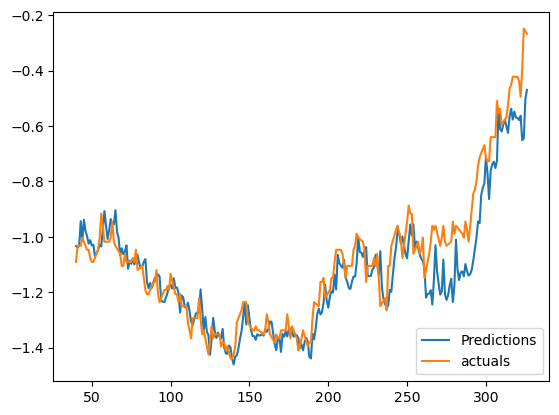

In [62]:
plt.plot(train_results['Train Predictions'][40:])
plt.plot(train_results['Actuals'][40:])
plt.legend(["Predictions", "actuals"], loc ="lower right")

### LSTM model

In [76]:
n_features = 7

# define model
model_lstm = Sequential()
model_lstm.add(InputLayer((n_steps, n_features)))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(n_steps,'relu'))
model_lstm.add(Dense(1,'linear'))

model_lstm.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                18432     
                                                                 
 dense_13 (Dense)            (None, 16)                1040      
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 19,489
Trainable params: 19,489
Non-trainable params: 0
_________________________________________________________________


In [77]:
# cp = ModelCheckpoint('/model_lstm/', save_best_only = True)

model_lstm.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# fit model
model_lstm.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500,  verbose=1, shuffle=False)

Epoch 1/500
82/82 [==============================] - 2s 9ms/step - loss: 0.5887 - root_mean_squared_error: 0.7673 - val_loss: 0.8594 - val_root_mean_squared_error: 0.9270
Epoch 2/500
82/82 [==============================] - 0s 5ms/step - loss: 0.3771 - root_mean_squared_error: 0.6141 - val_loss: 0.5647 - val_root_mean_squared_error: 0.7515
Epoch 3/500
82/82 [==============================] - 0s 5ms/step - loss: 0.2367 - root_mean_squared_error: 0.4865 - val_loss: 0.3292 - val_root_mean_squared_error: 0.5738
Epoch 4/500
82/82 [==============================] - 0s 5ms/step - loss: 0.1290 - root_mean_squared_error: 0.3592 - val_loss: 0.1550 - val_root_mean_squared_error: 0.3937
Epoch 5/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0625 - root_mean_squared_error: 0.2500 - val_loss: 0.0654 - val_root_mean_squared_error: 0.2557
Epoch 6/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0330 - root_mean_squared_error: 0.1817 - val_loss: 0.0438 - val_root_m

Epoch 49/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0057 - root_mean_squared_error: 0.0756 - val_loss: 0.0297 - val_root_mean_squared_error: 0.1724
Epoch 50/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0056 - root_mean_squared_error: 0.0749 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1725
Epoch 51/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0055 - root_mean_squared_error: 0.0742 - val_loss: 0.0294 - val_root_mean_squared_error: 0.1713
Epoch 52/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0054 - root_mean_squared_error: 0.0736 - val_loss: 0.0294 - val_root_mean_squared_error: 0.1713
Epoch 53/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0053 - root_mean_squared_error: 0.0729 - val_loss: 0.0292 - val_root_mean_squared_error: 0.1709
Epoch 54/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0052 - root_mean_squared_error: 0.0723 - val_loss: 0.0288 - val_

82/82 [==============================] - 0s 5ms/step - loss: 0.0050 - root_mean_squared_error: 0.0709 - val_loss: 0.0219 - val_root_mean_squared_error: 0.1481
Epoch 97/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0048 - root_mean_squared_error: 0.0694 - val_loss: 0.0161 - val_root_mean_squared_error: 0.1269
Epoch 98/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0047 - root_mean_squared_error: 0.0688 - val_loss: 0.0250 - val_root_mean_squared_error: 0.1581
Epoch 99/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0058 - root_mean_squared_error: 0.0759 - val_loss: 0.0159 - val_root_mean_squared_error: 0.1262
Epoch 100/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0068 - root_mean_squared_error: 0.0822 - val_loss: 0.0200 - val_root_mean_squared_error: 0.1413
Epoch 101/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0055 - root_mean_squared_error: 0.0739 - val_loss: 0.0121 - val_root_mean_s

82/82 [==============================] - 0s 5ms/step - loss: 0.0050 - root_mean_squared_error: 0.0708 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1120
Epoch 144/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0037 - root_mean_squared_error: 0.0612 - val_loss: 0.0173 - val_root_mean_squared_error: 0.1316
Epoch 145/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0047 - root_mean_squared_error: 0.0686 - val_loss: 0.0105 - val_root_mean_squared_error: 0.1024
Epoch 146/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0045 - root_mean_squared_error: 0.0667 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1141
Epoch 147/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0039 - root_mean_squared_error: 0.0626 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0944
Epoch 148/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0036 - root_mean_squared_error: 0.0597 - val_loss: 0.0132 - val_root_mea

82/82 [==============================] - 0s 5ms/step - loss: 0.0037 - root_mean_squared_error: 0.0608 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0981
Epoch 191/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0041 - root_mean_squared_error: 0.0641 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1118
Epoch 192/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0060 - root_mean_squared_error: 0.0773 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0900
Epoch 193/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0067 - root_mean_squared_error: 0.0818 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1198
Epoch 194/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0083 - root_mean_squared_error: 0.0913 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0856
Epoch 195/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0063 - root_mean_squared_error: 0.0791 - val_loss: 0.0107 - val_root_mea

82/82 [==============================] - 0s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0523 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0975
Epoch 238/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0544 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0998
Epoch 239/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0028 - root_mean_squared_error: 0.0531 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0976
Epoch 240/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0556 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0995
Epoch 241/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0029 - root_mean_squared_error: 0.0542 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0981
Epoch 242/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0032 - root_mean_squared_error: 0.0568 - val_loss: 0.0098 - val_root_mea

82/82 [==============================] - 0s 5ms/step - loss: 0.0029 - root_mean_squared_error: 0.0538 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0963
Epoch 285/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0521 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1006
Epoch 286/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0029 - root_mean_squared_error: 0.0538 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0964
Epoch 287/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0520 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1008
Epoch 288/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0029 - root_mean_squared_error: 0.0535 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0961
Epoch 289/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0518 - val_loss: 0.0102 - val_root_mea

82/82 [==============================] - 0s 5ms/step - loss: 0.0024 - root_mean_squared_error: 0.0493 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1015
Epoch 332/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0025 - root_mean_squared_error: 0.0504 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0925
Epoch 333/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0024 - root_mean_squared_error: 0.0493 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1015
Epoch 334/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0025 - root_mean_squared_error: 0.0502 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0922
Epoch 335/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0024 - root_mean_squared_error: 0.0490 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1013
Epoch 336/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0025 - root_mean_squared_error: 0.0498 - val_loss: 0.0085 - val_root_mea

82/82 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0434 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0937
Epoch 379/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0018 - root_mean_squared_error: 0.0427 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0918
Epoch 380/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0021 - root_mean_squared_error: 0.0462 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0975
Epoch 381/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0026 - root_mean_squared_error: 0.0511 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0907
Epoch 382/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0521 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0951
Epoch 383/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0023 - root_mean_squared_error: 0.0477 - val_loss: 0.0093 - val_root_mea

82/82 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0394 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0910
Epoch 426/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0398 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0930
Epoch 427/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0395 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0964
Epoch 428/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0395 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0928
Epoch 429/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0390 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0900
Epoch 430/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0394 - val_loss: 0.0087 - val_root_mea

82/82 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0384 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0916
Epoch 473/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0385 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0939
Epoch 474/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0390 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0941
Epoch 475/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0400 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0942
Epoch 476/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0433 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0947
Epoch 477/500
82/82 [==============================] - 0s 5ms/step - loss: 0.0018 - root_mean_squared_error: 0.0424 - val_loss: 0.0090 - val_root_mea

In [65]:
# from keras.models import load_model
# model_lstm = load_model('model_lstm/')

In [79]:
y_hat_lstm = model_lstm.predict(x_val, verbose=0)

In [80]:
train_results = pd.DataFrame(data={'Train Predictions':y_hat_lstm.flatten(),'Actuals':y_val})
print(train_results)

     Train Predictions   Actuals
0            -0.879565 -0.858389
1            -0.853532 -0.814813
2            -0.840230 -0.843864
3            -0.816518 -0.863231
4            -0.816533 -0.882599
..                 ...       ...
322          -0.665998 -0.495251
323          -0.648897 -0.393573
324          -0.677701 -0.248317
325          -0.549550 -0.258001
326          -0.477014 -0.267685

[327 rows x 2 columns]


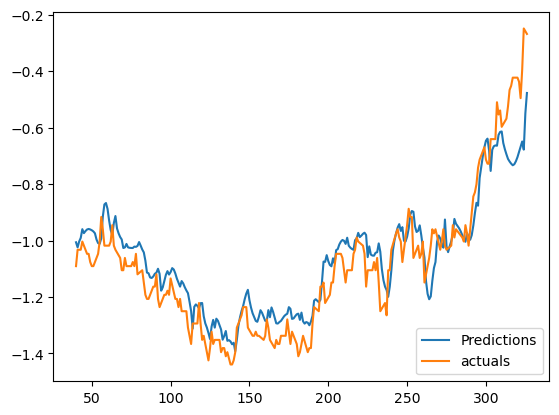

In [81]:
plt.plot(train_results['Train Predictions'][40:])
plt.plot(train_results['Actuals'][40:])
plt.legend(["Predictions", "actuals"], loc ="lower right")

## Feedforward NN model

In [82]:
n_features = 7

# define model
model_nn = Sequential()
model_nn.add(InputLayer((n_steps, n_features)))
model_nn.add(Dense(n_steps,'relu'))
model_nn.add(Dense(n_steps,'relu'))
model_nn.add(Flatten())
model_nn.add(Dense(1,'linear'))


model_nn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16, 16)            128       
                                                                 
 dense_16 (Dense)            (None, 16, 16)            272       
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                 257       
                                                                 
Total params: 657
Trainable params: 657
Non-trainable params: 0
_________________________________________________________________


In [83]:

model_nn.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# fit model
model_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500,  verbose=1, shuffle=False)

Epoch 1/500
82/82 [==============================] - 0s 2ms/step - loss: 0.6744 - root_mean_squared_error: 0.8212 - val_loss: 0.5149 - val_root_mean_squared_error: 0.7175
Epoch 2/500
82/82 [==============================] - 0s 927us/step - loss: 0.6055 - root_mean_squared_error: 0.7782 - val_loss: 0.2789 - val_root_mean_squared_error: 0.5281
Epoch 3/500
82/82 [==============================] - 0s 854us/step - loss: 0.5510 - root_mean_squared_error: 0.7423 - val_loss: 0.1328 - val_root_mean_squared_error: 0.3644
Epoch 4/500
82/82 [==============================] - 0s 904us/step - loss: 0.5036 - root_mean_squared_error: 0.7096 - val_loss: 0.0627 - val_root_mean_squared_error: 0.2504
Epoch 5/500
82/82 [==============================] - 0s 898us/step - loss: 0.4609 - root_mean_squared_error: 0.6789 - val_loss: 0.0575 - val_root_mean_squared_error: 0.2398
Epoch 6/500
82/82 [==============================] - 0s 907us/step - loss: 0.4221 - root_mean_squared_error: 0.6497 - val_loss: 0.1069 - 

82/82 [==============================] - 0s 849us/step - loss: 0.0248 - root_mean_squared_error: 0.1574 - val_loss: 0.1425 - val_root_mean_squared_error: 0.3775
Epoch 49/500
82/82 [==============================] - 0s 848us/step - loss: 0.0241 - root_mean_squared_error: 0.1554 - val_loss: 0.1360 - val_root_mean_squared_error: 0.3688
Epoch 50/500
82/82 [==============================] - 0s 861us/step - loss: 0.0235 - root_mean_squared_error: 0.1534 - val_loss: 0.1300 - val_root_mean_squared_error: 0.3606
Epoch 51/500
82/82 [==============================] - 0s 829us/step - loss: 0.0230 - root_mean_squared_error: 0.1516 - val_loss: 0.1247 - val_root_mean_squared_error: 0.3531
Epoch 52/500
82/82 [==============================] - 0s 840us/step - loss: 0.0224 - root_mean_squared_error: 0.1498 - val_loss: 0.1197 - val_root_mean_squared_error: 0.3460
Epoch 53/500
82/82 [==============================] - 0s 831us/step - loss: 0.0219 - root_mean_squared_error: 0.1481 - val_loss: 0.1152 - val_r

82/82 [==============================] - 0s 1ms/step - loss: 0.0110 - root_mean_squared_error: 0.1047 - val_loss: 0.0744 - val_root_mean_squared_error: 0.2728
Epoch 96/500
82/82 [==============================] - 0s 850us/step - loss: 0.0108 - root_mean_squared_error: 0.1040 - val_loss: 0.0748 - val_root_mean_squared_error: 0.2735
Epoch 97/500
82/82 [==============================] - 0s 841us/step - loss: 0.0107 - root_mean_squared_error: 0.1033 - val_loss: 0.0751 - val_root_mean_squared_error: 0.2740
Epoch 98/500
82/82 [==============================] - 0s 832us/step - loss: 0.0105 - root_mean_squared_error: 0.1027 - val_loss: 0.0756 - val_root_mean_squared_error: 0.2749
Epoch 99/500
82/82 [==============================] - 0s 842us/step - loss: 0.0104 - root_mean_squared_error: 0.1020 - val_loss: 0.0761 - val_root_mean_squared_error: 0.2759
Epoch 100/500
82/82 [==============================] - 0s 830us/step - loss: 0.0103 - root_mean_squared_error: 0.1014 - val_loss: 0.0766 - val_ro

Epoch 142/500
82/82 [==============================] - 0s 854us/step - loss: 0.0066 - root_mean_squared_error: 0.0813 - val_loss: 0.0869 - val_root_mean_squared_error: 0.2948
Epoch 143/500
82/82 [==============================] - 0s 829us/step - loss: 0.0066 - root_mean_squared_error: 0.0810 - val_loss: 0.0871 - val_root_mean_squared_error: 0.2952
Epoch 144/500
82/82 [==============================] - 0s 839us/step - loss: 0.0065 - root_mean_squared_error: 0.0807 - val_loss: 0.0882 - val_root_mean_squared_error: 0.2969
Epoch 145/500
82/82 [==============================] - 0s 845us/step - loss: 0.0065 - root_mean_squared_error: 0.0803 - val_loss: 0.0883 - val_root_mean_squared_error: 0.2972
Epoch 146/500
82/82 [==============================] - 0s 826us/step - loss: 0.0064 - root_mean_squared_error: 0.0800 - val_loss: 0.0881 - val_root_mean_squared_error: 0.2968
Epoch 147/500
82/82 [==============================] - 0s 830us/step - loss: 0.0064 - root_mean_squared_error: 0.0797 - val_l

Epoch 189/500
82/82 [==============================] - 0s 842us/step - loss: 0.0050 - root_mean_squared_error: 0.0708 - val_loss: 0.0790 - val_root_mean_squared_error: 0.2810
Epoch 190/500
82/82 [==============================] - 0s 834us/step - loss: 0.0051 - root_mean_squared_error: 0.0713 - val_loss: 0.0728 - val_root_mean_squared_error: 0.2697
Epoch 191/500
82/82 [==============================] - 0s 834us/step - loss: 0.0050 - root_mean_squared_error: 0.0704 - val_loss: 0.0805 - val_root_mean_squared_error: 0.2837
Epoch 192/500
82/82 [==============================] - 0s 833us/step - loss: 0.0050 - root_mean_squared_error: 0.0710 - val_loss: 0.0896 - val_root_mean_squared_error: 0.2994
Epoch 193/500
82/82 [==============================] - 0s 833us/step - loss: 0.0049 - root_mean_squared_error: 0.0699 - val_loss: 0.0822 - val_root_mean_squared_error: 0.2867
Epoch 194/500
82/82 [==============================] - 0s 832us/step - loss: 0.0050 - root_mean_squared_error: 0.0710 - val_l

Epoch 236/500
82/82 [==============================] - 0s 844us/step - loss: 0.0047 - root_mean_squared_error: 0.0686 - val_loss: 0.0808 - val_root_mean_squared_error: 0.2843
Epoch 237/500
82/82 [==============================] - 0s 827us/step - loss: 0.0056 - root_mean_squared_error: 0.0746 - val_loss: 0.0754 - val_root_mean_squared_error: 0.2745
Epoch 238/500
82/82 [==============================] - 0s 821us/step - loss: 0.0048 - root_mean_squared_error: 0.0689 - val_loss: 0.0386 - val_root_mean_squared_error: 0.1965
Epoch 239/500
82/82 [==============================] - 0s 835us/step - loss: 0.0053 - root_mean_squared_error: 0.0728 - val_loss: 0.0518 - val_root_mean_squared_error: 0.2277
Epoch 240/500
82/82 [==============================] - 0s 833us/step - loss: 0.0051 - root_mean_squared_error: 0.0711 - val_loss: 0.0876 - val_root_mean_squared_error: 0.2960
Epoch 241/500
82/82 [==============================] - 0s 836us/step - loss: 0.0049 - root_mean_squared_error: 0.0702 - val_l

Epoch 283/500
82/82 [==============================] - 0s 848us/step - loss: 0.0041 - root_mean_squared_error: 0.0640 - val_loss: 0.0536 - val_root_mean_squared_error: 0.2315
Epoch 284/500
82/82 [==============================] - 0s 841us/step - loss: 0.0047 - root_mean_squared_error: 0.0688 - val_loss: 0.0617 - val_root_mean_squared_error: 0.2484
Epoch 285/500
82/82 [==============================] - 0s 838us/step - loss: 0.0041 - root_mean_squared_error: 0.0638 - val_loss: 0.0339 - val_root_mean_squared_error: 0.1840
Epoch 286/500
82/82 [==============================] - 0s 828us/step - loss: 0.0046 - root_mean_squared_error: 0.0680 - val_loss: 0.0339 - val_root_mean_squared_error: 0.1841
Epoch 287/500
82/82 [==============================] - 0s 826us/step - loss: 0.0042 - root_mean_squared_error: 0.0649 - val_loss: 0.0614 - val_root_mean_squared_error: 0.2477
Epoch 288/500
82/82 [==============================] - 0s 831us/step - loss: 0.0045 - root_mean_squared_error: 0.0668 - val_l

Epoch 330/500
82/82 [==============================] - 0s 858us/step - loss: 0.0038 - root_mean_squared_error: 0.0614 - val_loss: 0.0260 - val_root_mean_squared_error: 0.1613
Epoch 331/500
82/82 [==============================] - 0s 837us/step - loss: 0.0039 - root_mean_squared_error: 0.0626 - val_loss: 0.0275 - val_root_mean_squared_error: 0.1659
Epoch 332/500
82/82 [==============================] - 0s 845us/step - loss: 0.0039 - root_mean_squared_error: 0.0621 - val_loss: 0.0447 - val_root_mean_squared_error: 0.2114
Epoch 333/500
82/82 [==============================] - 0s 829us/step - loss: 0.0038 - root_mean_squared_error: 0.0618 - val_loss: 0.0391 - val_root_mean_squared_error: 0.1978
Epoch 334/500
82/82 [==============================] - 0s 836us/step - loss: 0.0039 - root_mean_squared_error: 0.0622 - val_loss: 0.0245 - val_root_mean_squared_error: 0.1565
Epoch 335/500
82/82 [==============================] - 0s 841us/step - loss: 0.0038 - root_mean_squared_error: 0.0614 - val_l

Epoch 377/500
82/82 [==============================] - 0s 844us/step - loss: 0.0032 - root_mean_squared_error: 0.0564 - val_loss: 0.0230 - val_root_mean_squared_error: 0.1518
Epoch 378/500
82/82 [==============================] - 0s 832us/step - loss: 0.0031 - root_mean_squared_error: 0.0559 - val_loss: 0.0269 - val_root_mean_squared_error: 0.1639
Epoch 379/500
82/82 [==============================] - 0s 839us/step - loss: 0.0032 - root_mean_squared_error: 0.0562 - val_loss: 0.0309 - val_root_mean_squared_error: 0.1759
Epoch 380/500
82/82 [==============================] - 0s 846us/step - loss: 0.0032 - root_mean_squared_error: 0.0565 - val_loss: 0.0292 - val_root_mean_squared_error: 0.1708
Epoch 381/500
82/82 [==============================] - 0s 838us/step - loss: 0.0032 - root_mean_squared_error: 0.0562 - val_loss: 0.0238 - val_root_mean_squared_error: 0.1543
Epoch 382/500
82/82 [==============================] - 0s 833us/step - loss: 0.0033 - root_mean_squared_error: 0.0575 - val_l

Epoch 424/500
82/82 [==============================] - 0s 843us/step - loss: 0.0033 - root_mean_squared_error: 0.0573 - val_loss: 0.0164 - val_root_mean_squared_error: 0.1279
Epoch 425/500
82/82 [==============================] - 0s 836us/step - loss: 0.0034 - root_mean_squared_error: 0.0579 - val_loss: 0.0138 - val_root_mean_squared_error: 0.1175
Epoch 426/500
82/82 [==============================] - 0s 836us/step - loss: 0.0036 - root_mean_squared_error: 0.0599 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1431
Epoch 427/500
82/82 [==============================] - 0s 829us/step - loss: 0.0034 - root_mean_squared_error: 0.0586 - val_loss: 0.0330 - val_root_mean_squared_error: 0.1816
Epoch 428/500
82/82 [==============================] - 0s 827us/step - loss: 0.0037 - root_mean_squared_error: 0.0608 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1507
Epoch 429/500
82/82 [==============================] - 0s 831us/step - loss: 0.0037 - root_mean_squared_error: 0.0605 - val_l

Epoch 471/500
82/82 [==============================] - 0s 835us/step - loss: 0.0035 - root_mean_squared_error: 0.0592 - val_loss: 0.0159 - val_root_mean_squared_error: 0.1262
Epoch 472/500
82/82 [==============================] - 0s 831us/step - loss: 0.0034 - root_mean_squared_error: 0.0583 - val_loss: 0.0246 - val_root_mean_squared_error: 0.1567
Epoch 473/500
82/82 [==============================] - 0s 830us/step - loss: 0.0032 - root_mean_squared_error: 0.0570 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1251
Epoch 474/500
82/82 [==============================] - 0s 847us/step - loss: 0.0034 - root_mean_squared_error: 0.0583 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1005
Epoch 475/500
82/82 [==============================] - 0s 827us/step - loss: 0.0030 - root_mean_squared_error: 0.0551 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1130
Epoch 476/500
82/82 [==============================] - 0s 833us/step - loss: 0.0033 - root_mean_squared_error: 0.0577 - val_l

In [84]:
y_hat_nn = model_nn.predict(x_val, verbose=0)
len(y_hat_nn.flatten())

327

In [85]:
train_results = pd.DataFrame(data={'Train Predictions':y_hat_nn.flatten(),'Actuals':y_val})
print(train_results)

     Train Predictions   Actuals
0            -0.941891 -0.858389
1            -0.978723 -0.814813
2            -0.951294 -0.843864
3            -0.919039 -0.863231
4            -0.935727 -0.882599
..                 ...       ...
322          -0.693712 -0.495251
323          -0.755700 -0.393573
324          -0.570459 -0.248317
325          -0.575703 -0.258001
326          -0.575581 -0.267685

[327 rows x 2 columns]


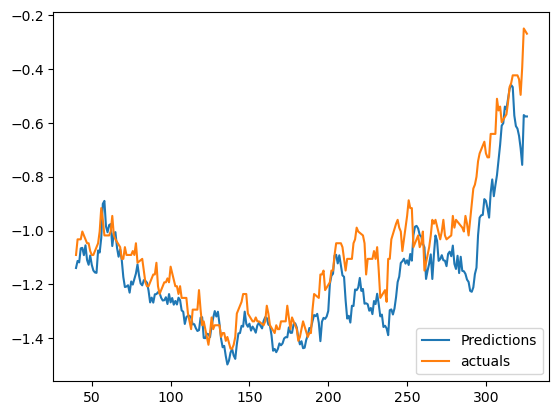

In [86]:
plt.plot(train_results['Train Predictions'][40:])
plt.plot(train_results['Actuals'][40:])
plt.legend(["Predictions", "actuals"], loc ="lower right")

In [87]:
# for inverse transformation input
df_scaled_input_inversed = scaler_input.inverse_transform(df_scaled_input)


# for inverse transformation output
scaled_y_hat_lstm = scaler_output.inverse_transform(y_hat_lstm)

scaled_y_hat_gru = scaler_output.inverse_transform(y_hat_gru)

scaled_y_hat_con1d = scaler_output.inverse_transform(y_hat_conv1d)




In [104]:
scaled_y_hat_gru

array([[2.117569 ],
       [2.1412756],
       [2.1410341],
       [2.1673489],
       [2.1594687],
       [2.145273 ],
       [2.131269 ],
       [2.1103563],
       [2.1066754],
       [2.122928 ],
       [2.1490352],
       [2.148867 ],
       [2.1433842],
       [2.144058 ],
       [2.1286657],
       [2.1347637],
       [2.1043324],
       [2.0888019],
       [2.0815063],
       [2.0814533],
       [2.0850413],
       [2.053714 ],
       [2.0564773],
       [2.0502799],
       [2.0585904],
       [2.0577703],
       [2.0568419],
       [2.0571816],
       [2.0326996],
       [2.0211656],
       [2.0070577],
       [1.9996675],
       [2.003657 ],
       [2.0120502],
       [2.0230904],
       [2.0108325],
       [2.0334764],
       [1.993474 ],
       [2.0291662],
       [2.0292785],
       [2.0167422],
       [2.0053413],
       [2.0280752],
       [2.0381753],
       [2.060921 ],
       [2.0450232],
       [2.048347 ],
       [2.04892  ],
       [2.0468388],
       [2.046094 ],


In [92]:
scaled_y_val = scaler_output.inverse_transform([y_val])

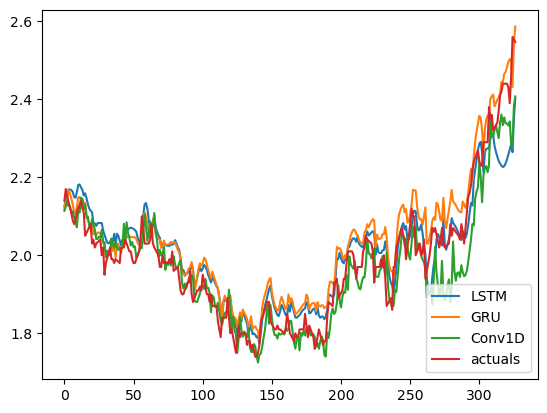

In [100]:
plt.plot(scaled_y_hat_lstm.flatten())
plt.plot(scaled_y_hat_gru.flatten())
plt.plot(scaled_y_hat_con1d.flatten())
plt.plot(scaled_y_val.flatten())

plt.legend(["LSTM","GRU","Conv1D", "actuals"], loc ="lower right")